<a href="https://colab.research.google.com/github/DedekMR29/google_colab/blob/main/jaringanSarafTiruan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

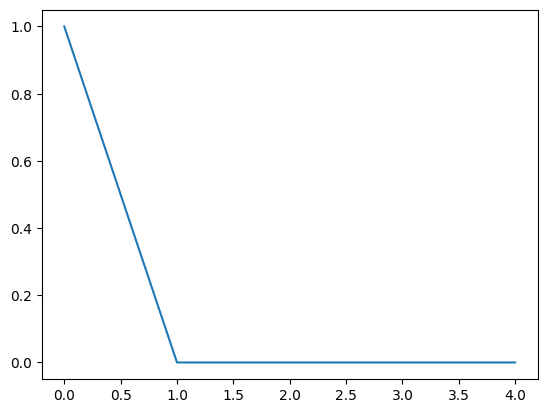

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x1 = np.array([1 ,0])
x2 = np.array([0 ,1])
t = np.array([0 ,1])

#menentukan Learning Rate
alpha = 0.5
#inisialisasi bobot
w1 = 0.5
w2 = 0.5
b = 0.2
loss = [];
for epoh in range(5) :
  loss.append(0)
  for NoData in range(2) :
    #menghitung Jumlah input berbobot
    net = x1[NoData]*w1+x2[NoData]*w2+b
    #menerapkan fungsi aktivasi untuk memperoleh output y
    if net >= 0 :
      y = 1
    else :
      y = 0
    #menghitung Error Propagasi
    e=t[NoData] - y
    #menghitung perubahan bobot
    dw1 = e*alpha*x1[NoData]
    dw2 = e*alpha*x2[NoData]
    db = e*alpha

    #memperbarui bobot
    w1 = w1+dw1
    w2 = w2+dw2
    b = b+db
    loss[epoh]=loss[epoh]+np.abs(e)
#menampilkan Grafik Loss
plt.plot(loss)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#Program ini terdiri dari dua fungsi yaitu :
# 1. Fungsi Training JST Perception
# 1. Fungsi Prediksi

#membuat fungsi untuk training perceptron dengan jumlah vektor input
#dan output jamak
def TrainingPerceptron(x,T) :
  #parameter JST :
  # 1. Fungsi Aktivasi = sigmoid
  # 2. Learning Rate (alpha)=0.5
  # 3. Fungsi Loss Jumlah Absolut Error Tiap Iterasi
  # 4. Jumlah iterasi (epoh) = 1000

  #langkah 1. inisialisasi Data
  JumlahData = x.shape[0]
  JumlahVektorInput = x.shape[1]
  JumlahVektorOutput = T.shape[1]

  #langkah 2 inisialisasi bobot dengan bilangan random dengan nilai maksimum 0.5
  w=np.random.rand(JumlahVektorInput, JumlahVektorOutput)*0.5

  #langkah 3 menentukan Learning Rate sebesar 0.5
  alpha = 0.5
  loss = []
  
  #langkah 4 melakukan iterasi untuk tuning bobot sebanyak 1000 kali
  for epoh in range(1000) :
    loss.append(0)
  #langkah 5. tuning bobot untuk setiap data
    for NData in range(JumlahData) :
      xi = x[NData : NData+1,:]
      net = np.matmul(x1,w)
      #menerapkan fungsi aktivasi sigmoid untuk mencari output
      y = 1/(1 + np.exp(-net))
      #menghitung error Propagasi
      e = T[NData : NData+1,:]-y
      #menghitung perubahan bobot
      dw = alpha*np.matmul(x1.transpose(),e)
      w=w+dw
      #menhitung loss dengan fungsi sum error
      loss[epoh]=loss[epoh] +np.sum(np.abs(e))
  return w,loss

#membuat fungsi prediksi data xp berdasar bobot w hasil pembelajaran JST
def Prediksi(xp,w) :
  net = np.matmul(xp,w)
  #menerapkan fungsi ativasi sigmoid
  yp = 1/(1 + np.exp(-net))
  return yp;


#======Program Utama========
# 1. Pembelajaran JST Perceptron
# data input tersimpan di dalam file xjamak.csv
# data target tersimpan di dalam file tjamak.csv
# membaca file data input X dari file xjamak.csv

X = np.loadtxt("xJamak.csv", delimiter=',')
#Membaca file data terget T yang dari file $tjamak.csv
T = np.loadtxt("tJamak.csv", delimiter=',')

#melakukan pembelajaran perceptron
w,loss = TrainingPerceptron(X,T)

#menampilkan grafik Loss
plt.plot(loss)

#2. Prediksi berdasar bobot hasil training
xp = np.array([[1,0,1,1]])
yp = Prediksi(xp,w)

print("Hasil Prediksi")
print(yp)

ValueError: ignored